***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dataset = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dataset

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
dataset.Renda.min()

0

In [5]:
dataset.Renda.max()

200000

In [6]:
classes_renda = [0, 1576, 3940, 11820, 19700, 200000]


In [7]:
788*25

19700

### 2º Definir os labels das classes

In [8]:
labels_renda = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [9]:
frequencia_renda = pd.value_counts(
                    pd.cut(x = dataset.Renda,
                        bins = classes_renda, 
                        labels = labels_renda,
                        include_lowest= True
                    )
)
frequencia_renda

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [10]:
percentual_renda = pd.value_counts(
                    pd.cut(x = dataset.Renda,
                        bins = classes_renda, 
                        labels = labels_renda,
                        include_lowest= True
                    ), normalize= True
)*100
percentual_renda

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
tabela_renda = pd.DataFrame(
        {'Frequencia' : frequencia_renda , 'Percentual' : percentual_renda}
)
tabela_renda.sort_index(ascending= False, inplace=True)
tabela_renda

,Frequencia,Percentual
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

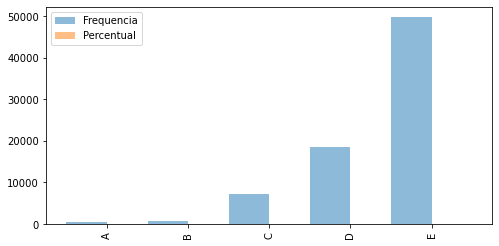

In [12]:
tabela_renda.plot.bar(width= 1, alpha = 0.5, figsize = (8,4))


<AxesSubplot:ylabel='Percentual'>

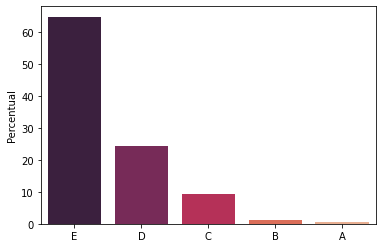

In [13]:
sns.barplot(x = tabela_renda.index, y ='Percentual', data = tabela_renda, palette='rocket')

In [14]:
#colhendo qauntidades das renda entre 1 á 2 salarios (length)

dataset.query('Renda < 1576')['Renda']
dataset.query('Renda < 788')['Renda']

4        150
35       600
42         0
43       300
46       750
        ... 
76733    500
76741    460
76755    300
76757    740
76768    700
Name: Renda, Length: 15301, dtype: int64

In [15]:
#criando dataFrame para vizualização de barras

total = 49357
sm1 = 15301
sm2 = total - sm1

dict_classE = {
    'Classe E': ['1 SM', '2 SM'],
    'Total' : [sm1, sm2]
}

dict_classE = pd.DataFrame(dict_classE)
dict_classE

,Classe E,Total
0,1 SM,15301
1,2 SM,34056


<AxesSubplot:xlabel='Classe E', ylabel='Total'>

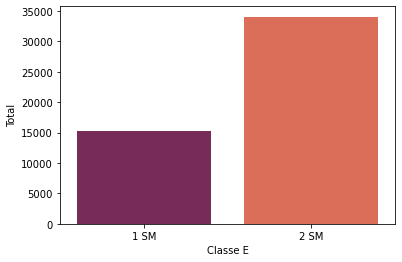

In [16]:
sns.barplot(data = dict_classE, x = 'Classe E', y = 'Total', palette='rocket')

> ### Conclusões

   De acordo com a análise da tabela de frequência da renda, mais da metade da população analisada (64%) encontra-se dentro da classe E. Portanto, cerca de 64% das famílias brasileiras sobrevivem com renda mensal de até R$1.576,00 por mês.
A tabela mostra uma pequena concentração de famílias com salários entre 2 á 5 salários mínimos (24) representado na classe D. Por último, a tabela nos mostra uma pequena taxa de famílias com salários acima de 15 SM (1,5), não chegando nem a 2 da população analisada

	Segundo o Dieese (Departamento Intersindical de Estatística e Estudos Socioeconômicos) o salário mínimo necessário para assegurar um mínimo de bem estar a uma família brasileira no ano de 2015, era de R$3.518,51. Portanto, em resumo, a tabela apresenta um cenário de precarização da vida dos brasileiros, com índices altos de famílias que sobrevivem com salários baixíssimos aos custos de uma qualidade de bem-estar social necessaria na realidade brasileira.



### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<AxesSubplot:>

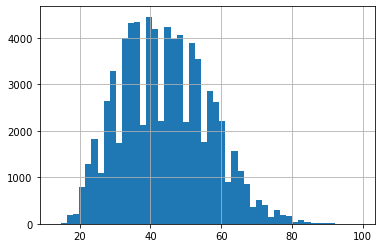

In [17]:
dataset.Idade.hist(bins=50)

<AxesSubplot:>

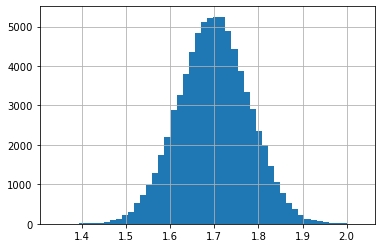

In [18]:
dataset.Altura.hist(bins=50)

C:\Users\jvara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


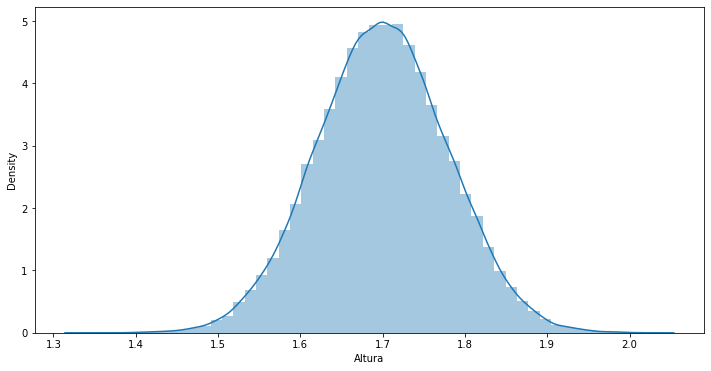

In [19]:
hist_altura = sns.distplot(dataset.Altura)

hist_altura.figure.set_size_inches(12,6)


C:\Users\jvara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


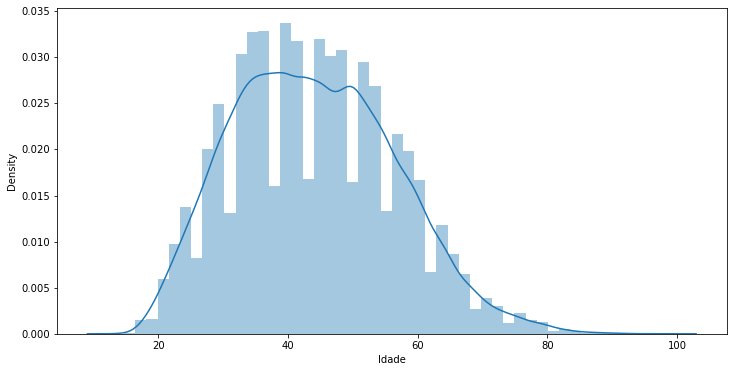

In [20]:
hist_altura = sns.distplot(dataset.Idade)

hist_altura.figure.set_size_inches(12,6)

C:\Users\jvara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


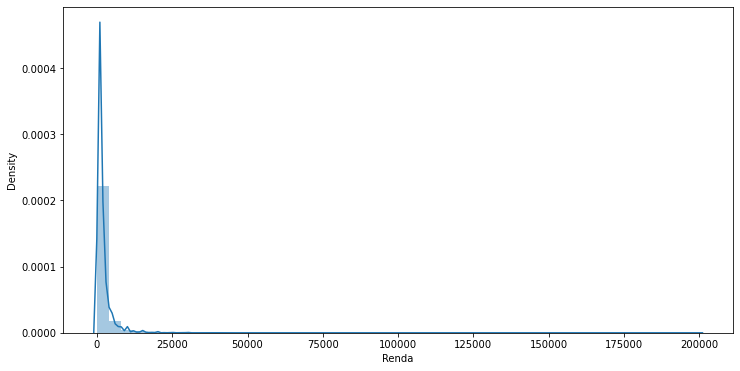

In [66]:
hist_renda = sns.distplot(dataset.Renda)
hist_renda.figure.set_size_inches(12,6)

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

Text(0.5, 1.0, 'Histograma da Renda')

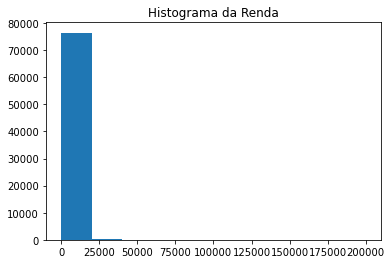

In [21]:
plt.hist(dataset.Renda)
plt.title('Histograma da Renda')


Text(0.5, 1.0, 'Histograma da Renda até 20.000,00')

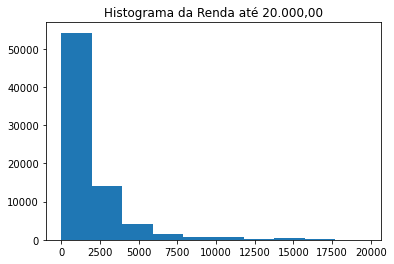

In [22]:
plt.hist(dataset.query('Renda < 20000').Renda)
plt.title('Histograma da Renda até 20.000,00')



C:\Users\jvara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


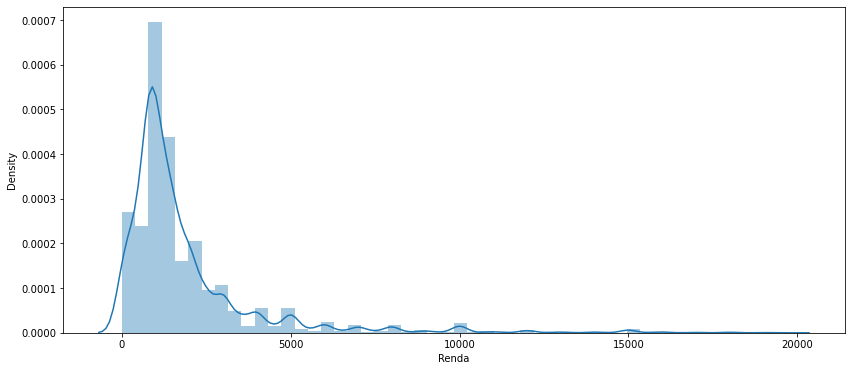

In [68]:
hist_renda = sns.distplot(dataset.query('Renda < 20000').Renda)
hist_renda.figure.set_size_inches(14,6)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [23]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [24]:
frequencia_sexo = dataset['Sexo'].value_counts()
frequencia_sexo

0    53250
1    23590
Name: Sexo, dtype: int64

In [25]:
percentual_sexo = dataset['Sexo'].value_counts(normalize=True)*100
percentual_sexo

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [26]:
dict_sexo = pd.DataFrame(
            {'Frequencia': frequencia_sexo, 'Percentual': percentual_sexo}
)
dict_sexo.rename(index = sexo, inplace=True)
dict_sexo

,Frequencia,Percentual
Masculino,53250,69.299844
Feminino,23590,30.700156


In [27]:
freq_sexocross = pd.crosstab(dataset.Sexo,
                         dataset.Cor)
freq_sexocross.rename(index = sexo,columns=cor, inplace=True)
freq_sexocross

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [28]:
percen_sexocross = pd.crosstab(dataset.Sexo,
                                dataset.Cor,
                                normalize=True
                                
)*100

percen_sexocross.rename(index = sexo,columns=cor, inplace=True)
percen_sexocross

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Com a análise das tabelas de frequências agrupadas por gênero e raça, conseguimos extrair algumas observações. 
A primeira em relação ao gênero, a pesquisa se concentra em apenas nos indivíduos que se reconhecem como chefes da família (que sustentam a partir da renda mensal), o que implica numa brusca interferência na coleta de dados. Cerca de 69 porcento da população investigada são do gênero masculino. Esse é um dado problemático quando consultamos a quantidade de mulheres e de homens totais no Brasil. Portanto há uma continuação da lógica patriarcal na sociabilidade brasileira.


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [29]:
dataset.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [30]:
dataset.Renda.median()

1200.0

### Obtenha a moda

In [69]:
dataset.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [32]:
dataset.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [33]:
dataset.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [34]:
dataset.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [71]:
renda_sexo_cor = pd.crosstab(
                    dataset.Cor,
                    dataset.Sexo,
                    values = dataset.Renda,
                    aggfunc = {'mean', 'median', 'max'}
)
renda_sexo_cor.rename(index = cor, columns= sexo, inplace=True)
renda_sexo_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

ALgumas refelxões extraidas do cruzamentos de dadois entre genero e raça sobre a renda. Os brancos possuem maior numeros maximos de renda nos dois generos. Porem os individuos que concideram-se amarelos possuem uma media maior que todas as outras raças. Por fim, o genero masculino possui numeros da medidas centrais maiores que o feminino no geral. 

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [72]:
dispersao_sexo_cor = pd.crosstab(
                    dataset.Cor,
                    dataset.Sexo,
                    values = dataset.Renda,
                    aggfunc = {'mad', 'var', 'std'}
)
dispersao_sexo_cor.rename(index = cor, columns= sexo, inplace=True)
dispersao_sexo_cor

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Para complementar a analise de cima, há uma dispersão interesante entre o genero femino da raça indigena. Há uma dispersão alta provocada por um individuo, assim puxando sua media e para patarma mais alto, porem conforme a dispersão, trata-se de uma execeção e nao corresponde a tendencia da amostragem.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

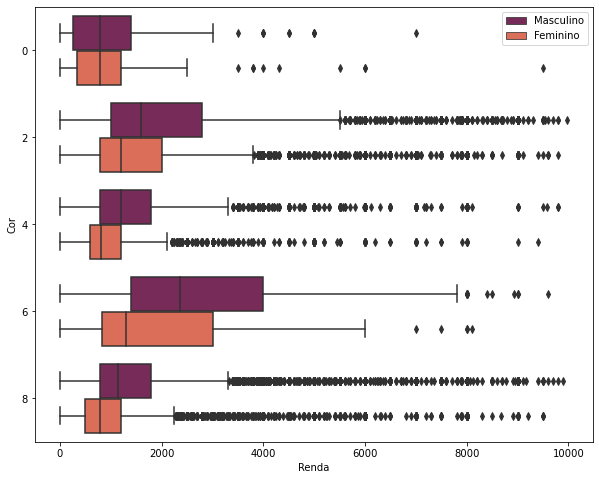

In [73]:
ax = sns.boxplot(x='Renda', y= 'Cor', hue='Sexo', data= dataset.query('Renda<10000'), orient='h', palette='rocket')
ax.figure.set_size_inches(10,8)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'])

> ### Conclusões

Os boxplots gerados indicam uma conecentração da renda nos valores entre 1 SM a 2 SM. com execeção da raça Amarela (6) que possui maior concentração de salarios mais altos de até 5 SM. Porem é a população Amarela condiz uma amostragem muito pegquena do resto da população. O genero masculino tem indicies maiores de renda.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [74]:
from scipy import stats

stats.percentileofscore(dataset.Renda, 788, kind='weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [39]:
dataset.Renda.quantile(0.99)

15000.0

In [40]:
dataset.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [41]:
anos_tabela = pd.crosstab(
                    dataset['Anos de Estudo'],
                    dataset.Sexo,
                    values = dataset.Renda,
                    aggfunc = ['mean', 'median', 'max', 'std']
)
anos_tabela.rename(index = anos_de_estudo, columns= sexo, inplace=True)
anos_tabela

mean                 median           \
Sexo                              Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   799.494638   516.201748       700      390   
1 ano                            895.629047   492.771987       788      400   
2 anos                           931.178986   529.911638       788      450   
3 anos                          1109.203862   546.853916       800      500   
4 anos                          1302.329283   704.279111      1000      788   
5 anos                          1338.653218   781.389776      1045      788   
6 anos                          1448.875419   833.732824      1200      788   
7 anos                          1465.497940   830.751004      1200      788   
8 anos                          1639.396667   933.615351      1300      800   
9 anos                          1508.038850   868.021700      1200      788   
10 anos                         1731.270847   925.919225      1218      800   
11 anos                         2117.060504  1286.790889      1500     1000   
12 anos                         2470.330776  1682.313725      1800     1200   
13 anos                         3195.099154  1911.730047      2400     1300   
14 anos                         3706.620269  2226.460457      2500     1600   
15 anos ou mais                 6134.279790  3899.513231      4000     2800   
Não determinados                1295.761905   798.174419      1200      788   

                                     max                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     30000    10000  1023.904884   639.311534  
1 ano                              30000     2000  1331.950552   425.291842  
2 anos                             40000     4000  1435.173827   498.234168  
3 anos                             80000     3500  2143.800133   424.124446  
4 anos                             50000    10000  1419.821787   629.553397  
5 anos                             35000     8000  1484.650587   635.782641  
6 anos                             25000     6000  1476.628602   574.547028  
7 anos                             40000     9000  1419.708673   602.038029  
8 anos                             30000    18000  1515.583715   896.781213  
9 anos                             60000    20000  2137.664774   973.221652  
10 anos                            45000     6000  2078.609734   620.611907  
11 anos                           200000   100000  2676.538942  1819.040417  
12 anos                            30000   120000  2268.081538  4851.833513  
13 anos                            25000    20000  2797.116800  2053.789771  
14 anos                            50000    20000  3987.214974  2064.083336  
15 anos ou mais                   200000   100000  7447.613594  4212.770709  
Não determinados                    7000     3000   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 0, 'R$')

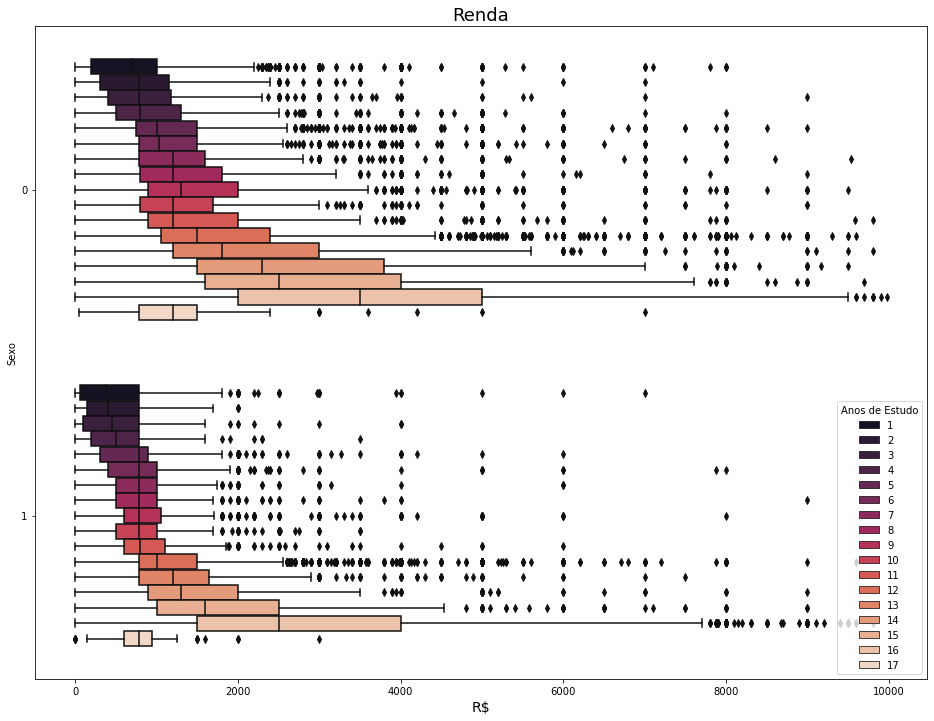

In [42]:
ax = sns.boxplot(x='Renda', y= 'Sexo', hue='Anos de Estudo', data= dataset.query('Renda<10000'), orient='h', palette='rocket')
ax.figure.set_size_inches(16,12)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

Text(0.5, 0, 'R$')

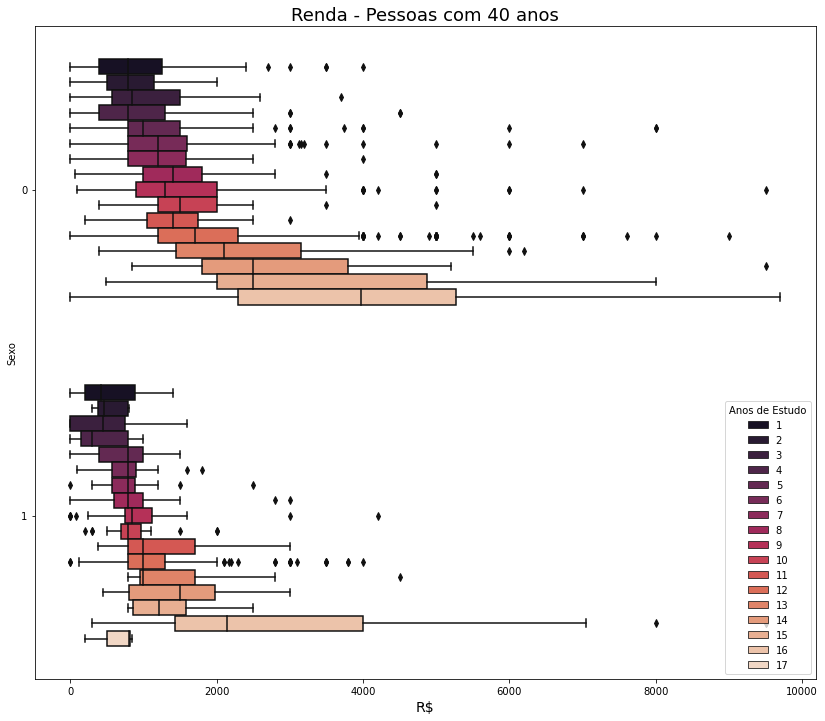

In [43]:
ax = sns.boxplot(x='Renda', y= 'Sexo', hue='Anos de Estudo', data= dataset.query('Renda<10000 and Idade == 40'), orient='h', palette='rocket')
ax.figure.set_size_inches(14,12)
ax.set_title('Renda - Pessoas com 40 anos', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

Text(0.5, 0, 'R$')

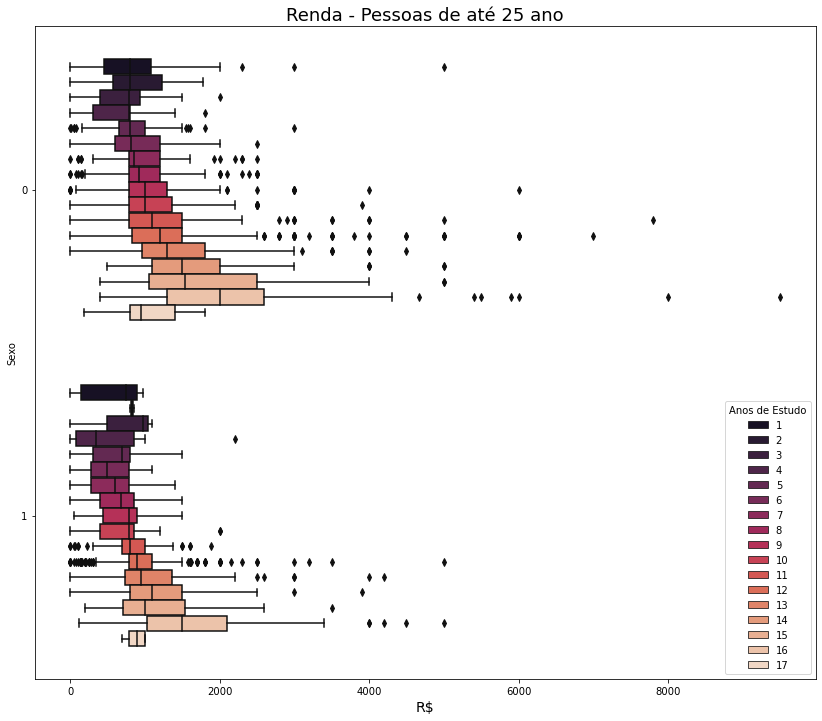

In [45]:
ax = sns.boxplot(x='Renda', y= 'Sexo', hue='Anos de Estudo', data= dataset.query('Renda<10000 and Idade < 25'), orient='h', palette='rocket')
ax.figure.set_size_inches(14,12)
ax.set_title('Renda - Pessoas de até 25 ano', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...

UF  Sexo  Idade  Cor  Anos de Estudo  Renda  Altura  
11  0     15     4    6               400    1.641466    1
          17     8    8               1500   1.664838    1
          50     8    5               200    1.652592    1
                      3               800    1.669687    1
                      2               1600   1.691955    1
                                                        ..
53  1     18     8    13              670    1.679585    1
                 4    9               788    1.600207    1
    0     81     8    3               500    1.635650    1
          78     8    12              1480   1.601673    1
    1     80     2    1               0      1.660106    1
Length: 76840, dtype: int64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [62]:
federacao =dataset.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std'] })
federacao.rename(index = uf, inplace=True)
federacao.sort_values(by=('Renda', 'mean'))

Renda                             
                            mean  median     max          std
UF                                                           
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Sergipe              1109.111111   788.0   16000  1478.997878
Alagoas              1144.552602   788.0   11000  1237.856197
Ceará                1255.403692   789.0   25000  1821.963536
Paraíba              1293.370487   788.0   30000  1950.272431
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Pará                 1399.076871   850.0   50000  2053.779555
Bahia                1429.645094   800.0  200000  3507.917248
Amazonas             1445.130100   900.0   22000  1757.935591
Acre                 1506.091782   900.0   30000  2276.233415
Pernambuco           1527.079319   900.0   50000  2389.622497
Tocantins            1771.094946  1000.0   60000  2934.590741
Roraima              1783.588889  1000.0   20000  2079.659238
Rondônia             1789.761223  1200.0   50000  2406.161161
Amapá                1861.353516  1200.0   15580  2020.688632
Goiás                1994.580794  1500.0   30000  2221.933065
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Paraná               2493.870753  1500.0  200000  4302.937995
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

Text(0.5, 0, 'R$')

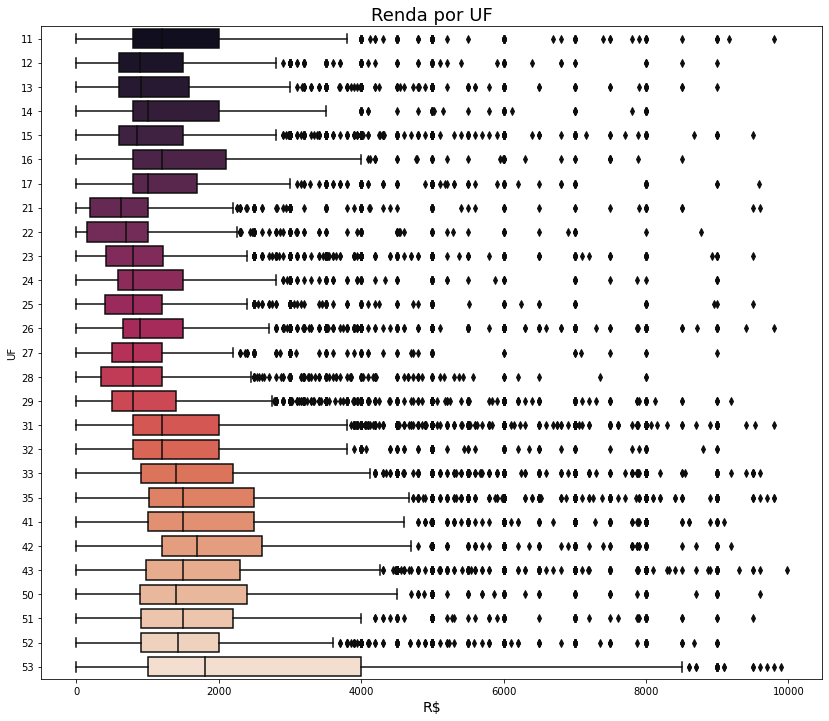

In [64]:
ax = sns.boxplot(x='Renda', y= 'UF', data= dataset.query('Renda<10000'), orient='h', palette='rocket')
ax.figure.set_size_inches(14,12)
ax.set_title('Renda por UF', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...